# Load data

In [2]:
import pandas as pd
path='D:/VScode/Last_deglaciation/data_fig3/'

# read the df_full_orbital.csv
df_full_orbital_EBM=pd.read_csv(path+'df_full_orbital_EBM.csv')
# read the df_obl.csv
df_obl_EBM=pd.read_csv(path+'df_obl_EBM.csv')
# read the df_pre_EBM.csv
df_pre_EBM=pd.read_csv(path+'df_pre_EBM.csv')
# read the df_GHG_EBM.csv
df_GHG_EBM=pd.read_csv(path+'df_GHG_EBM.csv')
# read df_orb_noice_EBM.csv
df_orb_noice_EBM=pd.read_csv(path+'df_orb_noice_EBM.csv')


# load orbital parameters
df_ecc=pd.read_csv(path+'df_ecc.csv')
df_pre=pd.read_csv(path+'df_pre.csv')
df_obl=pd.read_csv(path+'df_obl.csv')

# Plot

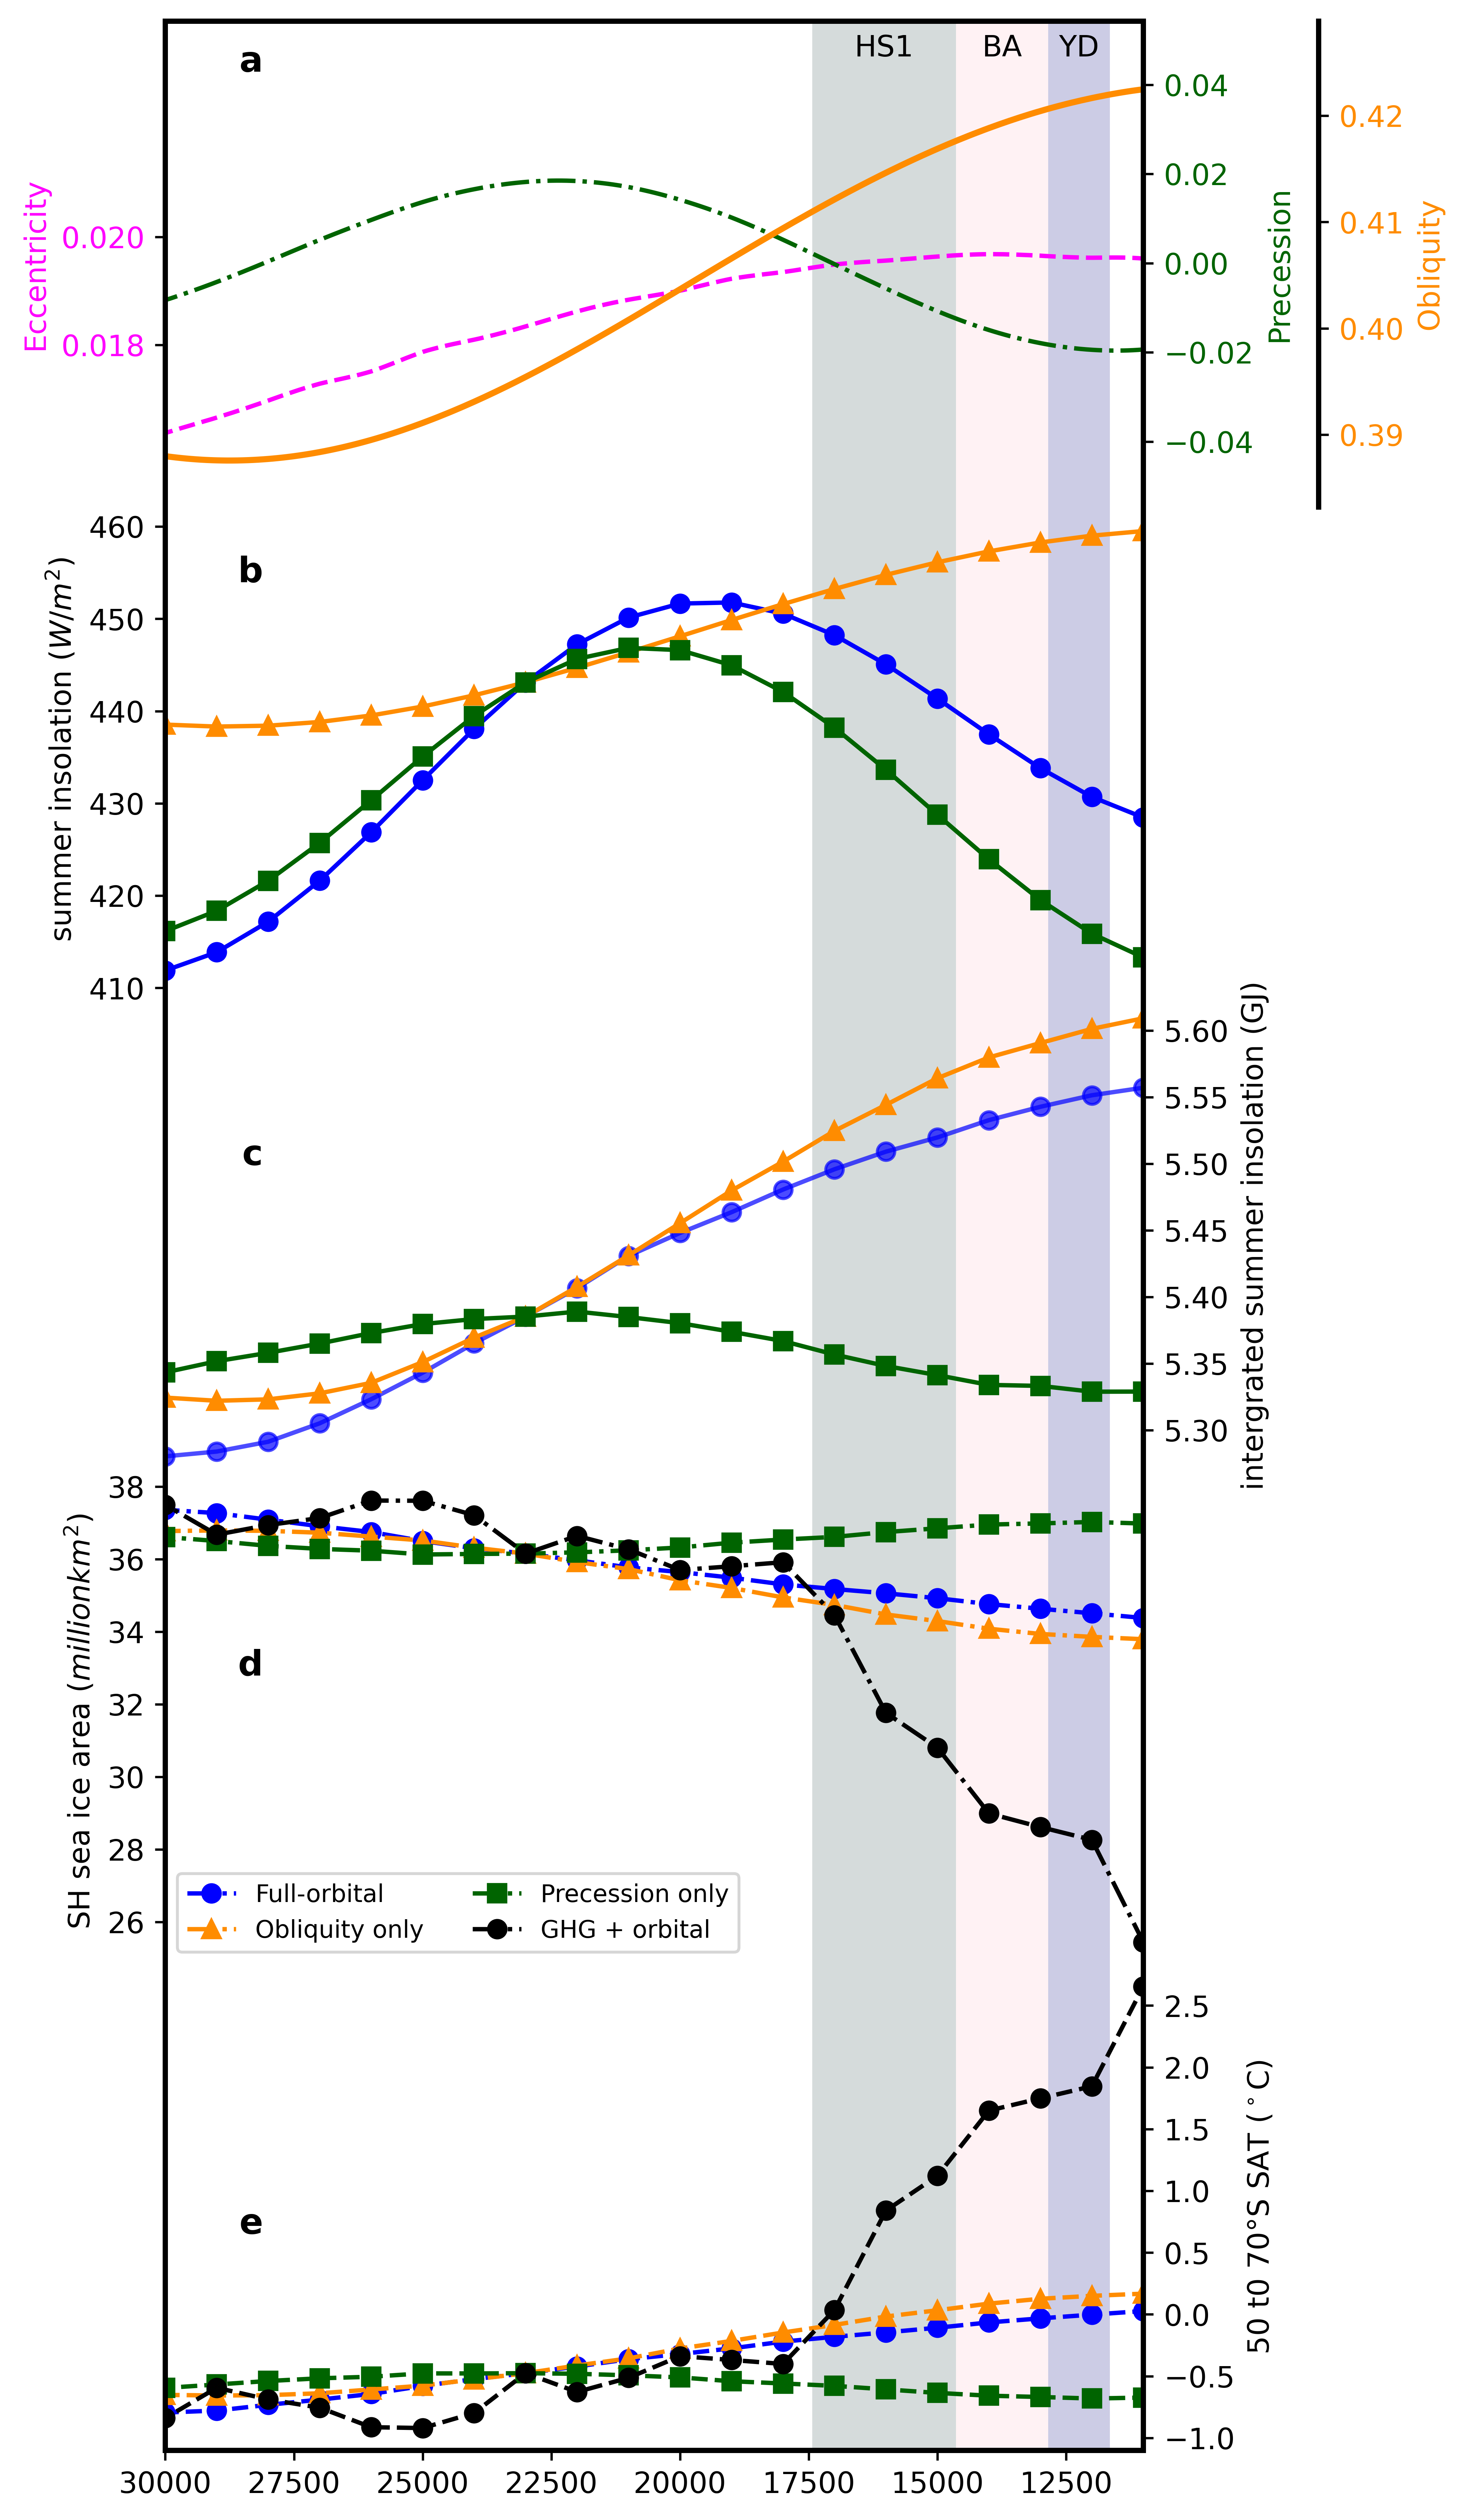

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches


# Periods for the vertical grey bars
HS1 = np.array([17480, 14692]) - 50  # convert to b1950
BA = np.array([14692, 12896]) - 50
YD = np.array([12896, 11703]) - 50

# Define the grey color with a transparency using RGBA tuple
grey_color = (0.8, 0.8, 0.8, 0.5)  # Grey color with 50% transparency.

# Function to add grey bars to the subplots
def add_grey_bars(ax):

    ax.axvspan(HS1[1], HS1[0], color='darkslategray', alpha=0.2, lw=0,zorder=-1)
    ax.axvspan(BA[1], BA[0], color='pink', alpha=0.2, lw=0,zorder=-1)
    ax.axvspan(YD[1], YD[0], color='navy', alpha=0.2, lw=0,zorder=-1)


emb_color=['blue','darkorange','darkgreen','balck','magenta']
emb_symbol=['o','^','s','D','*']
# Create subplots
fig, axs = plt.subplots(5, 1, figsize=(6, 15), dpi=600,sharex=True)



# Plot Eccentricity
axs[0].plot(df_ecc['age'], df_ecc['ecc'], color='magenta', label='Eccentricity', linestyle='--')
axs[0].set_ylabel('Eccentricity', color='magenta')
# set y axis limit
axs[0].set_ylim(0.015, 0.024)
# set y ticks
axs[0].set_yticks([0.018, 0.02])
axs[0].tick_params(axis='y', labelcolor='magenta')
axs[0].spines['bottom'].set_visible(False)

axs[0].text(x=np.mean(HS1), y=0.99 * np.max(axs[0].get_ylim()), s='HS1', ha='center', va='top')
axs[0].text(x=np.mean(BA), y=0.99 * np.max(axs[0].get_ylim()), s='BA', ha='center', va='top')
axs[0].text(x=np.mean(YD), y=0.99 * np.max(axs[0].get_ylim()), s='YD', ha='center', va='top')
# invert the x axis
axs[0].invert_xaxis()
axs[0].set_xlim(30000,10000)

# Create first twin axis for Precession
ax0_1 = axs[0].twinx()
ax0_1.plot(df_pre['age'], df_pre['pre'], color='darkgreen', label='Precession', linestyle='-.')
ax0_1.set_ylabel('Precession', color='darkgreen')
ax0_1.tick_params(axis='y', labelcolor='darkgreen')
# show y axis and ticks on the right
ax0_1.yaxis.tick_right()
ax0_1.yaxis.set_label_position("right")
ax0_1.spines['bottom'].set_visible(False)

# Create second twin axis for Obliquity, positioned on the right
# plot obl data in dark blue
ax0_2 = axs[0].twinx()
ax0_2.plot(df_obl['age'], df_obl['obl'], color='darkorange', label='Obliquity',linewidth=2.1)
ax0_2.set_ylabel('Obliquity', color='darkorange')
ax0_2.tick_params(axis='y', labelcolor='darkorange')
# set the line width of the y axis to 1.8
ax0_2.spines['right'].set_linewidth(1.8)

# Adjust the position of the second twin axis
ax0_2.spines['right'].set_position(('outward', 60))  # Offset the right spine of ax0_2
ax0_2.spines['bottom'].set_visible(False)

	
axs[1].plot(df_full_orbital_EBM['age'], df_full_orbital_EBM['60S summer inso (21 Dec to 21 Feb)'], color=emb_color[0], marker=emb_symbol[0],alpha=1,label='Full-orbital')
axs[1].plot(df_obl_EBM['age'], df_obl_EBM['60S summer inso (21 Dec to 21 Feb)'], color=emb_color[1], marker=emb_symbol[1],alpha=1,label='Obliquity only')
axs[1].plot(df_pre_EBM['age'], df_pre_EBM['60S summer inso (21 Dec to 21 Feb)'], color=emb_color[2], marker=emb_symbol[2],alpha=1,label='Precession only')
# set y axis limit
# axs[1].set_ylim(410, 460)
axs[1].set_ylabel('summer insolation ($W/m^2$)')
axs[1].tick_params(axis='y')
# set x axis limit
axs[1].set_xlim(30000,11000)

# ax2 = axs[1].twinx()
axs[2].plot(df_full_orbital_EBM['age'], df_full_orbital_EBM['Inter_summer_inso'], alpha=0.7,color=emb_color[0], marker=emb_symbol[0], label='Full-orbital')
axs[2].plot(df_obl_EBM['age'], df_obl_EBM['Inter_summer_inso'], color=emb_color[1], marker=emb_symbol[1], alpha=1,label='Obliquity only')
axs[2].plot(df_pre_EBM['age'], df_pre_EBM['Inter_summer_inso'], color=emb_color[2], marker=emb_symbol[2],label='Precession only')
# axs[2].legend(loc='upper left', ncol=3, fontsize='small')
axs[2].set_ylabel('intergrated summer insolation (GJ)')
axs[2].tick_params(axis='y')
# show y ticks and y tick labels on the right
axs[2].yaxis.tick_right()
axs[2].yaxis.set_label_position("right")



axs[3].spines['top'].set_visible(False)
axs[3].spines['bottom'].set_visible(False)
# plot the full orbital iceA (SH)
axs[3].plot(df_full_orbital_EBM['age'], df_full_orbital_EBM['iceA (SH)'], color=emb_color[0], marker=emb_symbol[0], linestyle='-.',label='Full-orbital')
# plot the obliquity only iceA (SH)
axs[3].plot(df_obl_EBM['age'], df_obl_EBM['iceA (SH)'], color=emb_color[1], marker=emb_symbol[1], linestyle='-.', label='Obliquity only')
# plot the precession only iceA (SH)
axs[3].plot(df_pre_EBM['age'], df_pre_EBM['iceA (SH)'], color=emb_color[2], marker=emb_symbol[2],linestyle='-.', label='Precession only')
# plot the GHG + orbital iceA (SH)
axs[3].plot(df_GHG_EBM['age'], df_GHG_EBM['iceA (SH)'], color='black', marker='o', linestyle='-.', label='GHG + orbital')
# plot the full orbital no ice experiment iceA (SH)
# axs[3].plot(df_orb_noice_EBM['age'], df_orb_noice_EBM['iceA (SH)'], color=emb_color[4], marker=emb_symbol[4], linestyle='-.',label='Full-orbital, No ice')
# add y axis label
axs[3].set_ylabel('SH sea ice area ($million km^2$)')
axs[3].legend(loc='lower left', ncol=2, fontsize='small')



# plot the full orbital SAT (50 to 70S)
axs[4].plot(df_full_orbital_EBM['age'], df_full_orbital_EBM['SAT (50 to 70S)'], color=emb_color[0], marker=emb_symbol[0], linestyle='--')
# plot the obliquity only SAT (50 to 70S)
axs[4].plot(df_obl_EBM['age'], df_obl_EBM['SAT (50 to 70S)'], color=emb_color[1], marker=emb_symbol[1], linestyle='--')
# plot the precession only SAT (50 to 70S)
axs[4].plot(df_pre_EBM['age'], df_pre_EBM['SAT (50 to 70S)'], color=emb_color[2], marker=emb_symbol[2], linestyle='--')
# plot the GHG + orbital SAT (50 to 70S)
axs[4].plot(df_GHG_EBM['age'], df_GHG_EBM['SAT (50 to 70S)'], color='black', marker='o', linestyle='--',label='GHG +orbital')

# # plot the full orbital no ice experiment SAT (50 to 70S)
# axs[4].plot(df_orb_noice_EBM['age'], df_orb_noice_EBM['SAT (50 to 70S)'], color=emb_color[4], marker=emb_symbol[4], linestyle='--',label='Full-orbital, No ice')


axs[4].spines['top'].set_visible(False)
# set y ticks and y tick labels on the right
axs[4].yaxis.tick_right()
axs[4].yaxis.set_label_position("right")
# add y axis label
axs[4].set_ylabel('50 t0 70°S SAT ($^\circ$C)')


# set the boundary between the two subplots to be invisible
axs[0].spines['bottom'].set_visible(False)
ax0_1.spines['bottom'].set_visible(False)
ax0_2.spines['bottom'].set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[2].spines['top'].set_visible(False)
axs[2].spines['bottom'].set_visible(False)
axs[3].spines['top'].set_visible(False)
axs[3].spines['bottom'].set_visible(False)



# Label for subplots
axs[0].text(0.1, 0.95, 'a', transform=axs[0].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
axs[1].text(0.1, 0.9, 'b', transform=axs[1].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
axs[2].text(0.1, 0.7, 'c', transform=axs[2].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
axs[3].text(0.1, 0.65, 'd', transform=axs[3].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
axs[4].text(0.1, 0.5, 'e', transform=axs[4].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')



# Get the coordinates for the axes
top = axs[0].get_position().y1
bottom = axs[-1].get_position().y0
left = axs[0].get_position().x0  # Assuming the left y-axis is used
right = axs[0].get_position().x1  # Assuming the right y-axis is not extended

# Create a box that connects all y-axes and the top of the first subplot, and the bottom of the last subplot
# The coordinates are adjusted so that the left and right sides of the box align with the y-axis line
box = patches.FancyBboxPatch(
    (left, bottom), right-left, top-bottom,
    transform=fig.transFigure, boxstyle="square,pad=0", 
    ec="black", fc="none", lw=1.8, clip_on=False
)

# Add the box to the figure
fig.patches.extend([box])

for ax in axs:
    add_grey_bars(ax)


# adjust vertical space between subplots
fig.subplots_adjust(hspace=0)

# Show plot
plt.show()

In [5]:
output_path = 'D:/VScode/Last_deglaciation/fig_exp_temp/'
fig.savefig(output_path+'/EBM_comparison.svg', format='svg', dpi=600,bbox_inches='tight')

# Read the processed sea ice extend data
Processed data from Roach et al., 2022, https://doi.org/10.1038/s41561-022-00913-6

original data reference: Meier, W., Fetterer, F., Windnagel, A. & Stewart, J. NOAA/NSIDC Climate Data Record of Passive Microwave Sea Ice Concentration Version 4 (NSIDC, 2021).

In [6]:
import xarray as xr
siads = xr.open_dataset('D:/VScode/Last_deglaciation/data/sia_sie_daily_CDRv4_1979-2018.nc').rename({'time':'day'})
siads

<xarray.Dataset>
Dimensions:     (day: 365, year: 40)
Coordinates:
  * day         (day) int64 1 2 3 4 5 6 7 8 ... 358 359 360 361 362 363 364 365
  * year        (year) int64 1979 1980 1981 1982 1983 ... 2015 2016 2017 2018
Data variables:
    sia_nh_cdr  (year, day) float64 ...
    sia_nh_bt   (year, day) float64 ...
    sia_nh_nt   (year, day) float64 ...
    sie_nh_cdr  (year, day) float64 ...
    sie_nh_bt   (year, day) float64 ...
    sie_nh_nt   (year, day) float64 ...
    sia_sh_cdr  (year, day) float64 ...
    sia_sh_bt   (year, day) float64 ...
    sia_sh_nt   (year, day) float64 ...
    sie_sh_cdr  (year, day) float64 ...
    sie_sh_bt   (year, day) float64 ...
    sie_sh_nt   (year, day) float64 ...
Attributes: (12/41)
    Conventions:               CF-1.6, ACDD-1.3
    title:                     NOAA/NSIDC Climate Data Record of Passive Micr...
    references:                Comiso, J. C., and F. Nishio. 2008. Trends in ...
    comment:                   none
    program:                   NOAA Climate Data Record Program
    cdr_variable:              cdr_seaice_conc
    ...                        ...
    platform:                  NIMBUS-7
    sensor:                    SMMR > Scanning Multichannel Microwave Radiometer
    date_created:              2021-06-21T17:10:17Z
    time_coverage_start:       1979-01-01T00:00:00Z
    time_coverage_end:         1979-01-01T23:59:59Z
    processed:                 SIA and SIE computed by Lettie Roach, 2021

# Read the sea ice extent data from the EBM for age=0, F=0

In [23]:
import scipy.io

# Load the files
iceA_corrected_data = scipy.io.loadmat('D:/VScode/Last_deglaciation/data/iceA_corrected.mat')

iceA_corrected = iceA_corrected_data['iceA_corrected']


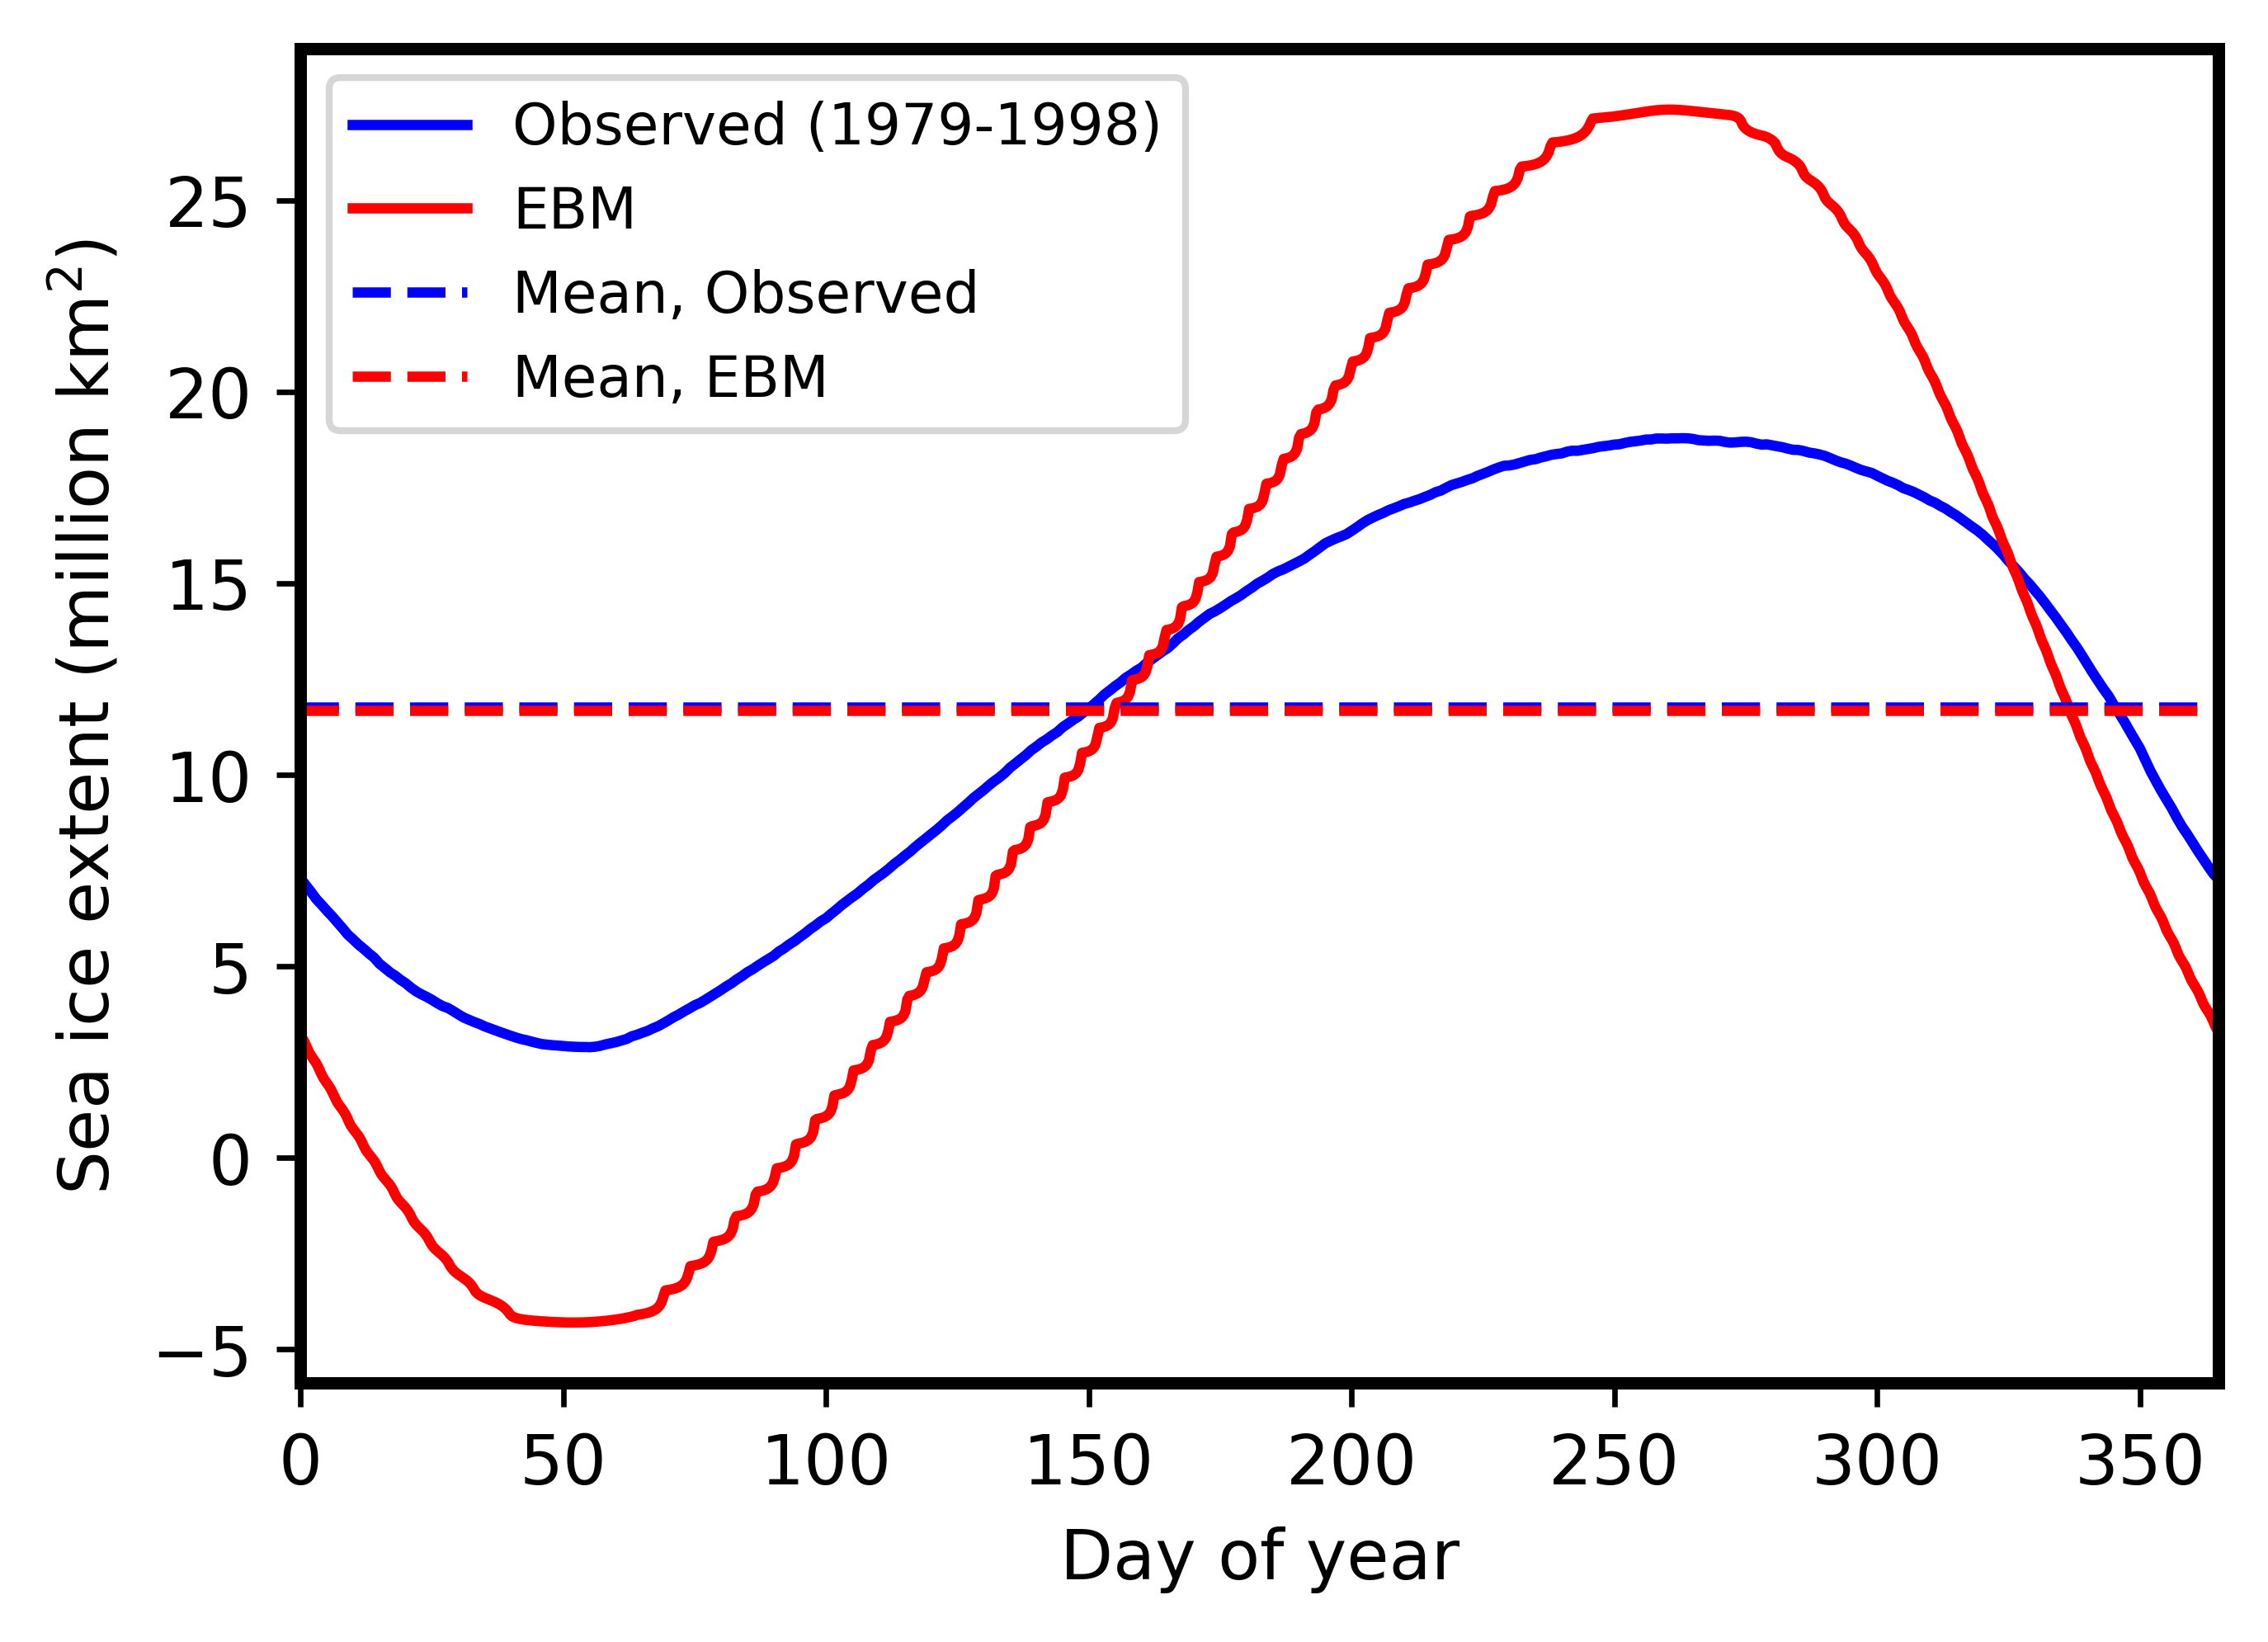

In [30]:
import matplotlib.pyplot as plt

sy = 1979
ey = 1998
myds = siads.sel(year=slice(sy,ey)).mean(dim='year')

fig = plt.figure(figsize=(5,3.5),dpi=600)
ax = fig.add_subplot(1, 1, 1)  # Adding a single subplot

myds['sie_sh_cdr'].plot(ax=ax, linestyle='-', color='b', label='Observed (1979-1998)')
ax.plot(np.linspace(0,365,1000), iceA_corrected, linestyle='-', color='r', label='EBM')
# plot the mean of myds['sie_sh_cdr'] as a horizontal line
ax.axhline(myds['sie_sh_cdr'].mean(), linestyle='--', color='b', label='Mean, Observed')
# plot the mean of iceA_corrected as a horizontal line
ax.axhline(iceA_corrected.mean(), linestyle='--', color='r', label='Mean, EBM')

# set the x axis limit
ax.set_xlim(0,365)

# add legend
ax.legend(loc='upper left', ncol=1, fontsize='small')
plt.xlabel('Day of year')
plt.ylabel('Sea ice extent (million km$^2$)')
# set the linewidth of the box to 1.8
ax.spines['top'].set_linewidth(1.8)
ax.spines['right'].set_linewidth(1.8)
ax.spines['bottom'].set_linewidth(1.8)
ax.spines['left'].set_linewidth(1.8)
plt.show()  # Show the plot


In [31]:
output_path = 'D:/VScode/Last_deglaciation/fig_exp_temp/'
fig.savefig(output_path+'/EBM_IceA_obs_comp.svg', format='svg', dpi=600,bbox_inches='tight')